# Navigation

---

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


# 3. Train a smart agent to collect yellow bananas and avoid blue ones!

In the next code cell, an agent is trained using a standard Deep Q-Learning Algorithm.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# Importing all necessary packages such as PyTorch, the Neural Network and Agent files (which can be found in this repository)
import random
import datetime
import torch
from collections import deque
import pandas as pd
from dqn_navigator_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

# This line calls the code in the dqn_navigation_agent file, it creates an agent based on the environment described above
agent = Agent(state_size=37, action_size=4, seed=0)



In [6]:
def dqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                         # list containing scores from each episode
    scores_window = deque(maxlen=50)    # last 50 scores
    eps = eps_start                     # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] # Get the current state
        score = 0  # Reset the score to 0 at the beginning of an episode
        for t in range(max_t):
            action = agent.act(state, eps)                 # Get the action given the current state for timestep t
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # Check if the episode is over, else continue
            agent.step(state, action, reward, next_state, done)  # Take a step in the environment
            state = next_state                             # Update the state variable to t from t-1
            score += reward                                # Append the reward achieved for this time step
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 25 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-25, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_{}.pth'.format(
                        datetime.datetime.today().strftime('%Y-%m-%d_%H-%M')))
            break
    return scores

scores = dqn()


Episode 25	Average Score: 0.28
Episode 50	Average Score: 0.46
Episode 75	Average Score: 0.92
Episode 100	Average Score: 1.56
Episode 125	Average Score: 2.34
Episode 150	Average Score: 3.20
Episode 175	Average Score: 4.38
Episode 200	Average Score: 5.10
Episode 225	Average Score: 5.44
Episode 250	Average Score: 5.92
Episode 275	Average Score: 6.62
Episode 300	Average Score: 8.02
Episode 325	Average Score: 9.48
Episode 350	Average Score: 9.84
Episode 375	Average Score: 10.30
Episode 400	Average Score: 11.36
Episode 425	Average Score: 11.64
Episode 450	Average Score: 12.00
Episode 475	Average Score: 12.86
Episode 478	Average Score: 13.20
Environment solved in 453 episodes!	Average Score: 13.20


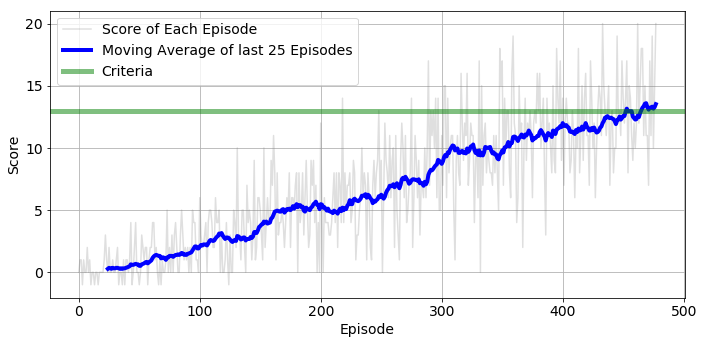

In [8]:
# plot the scores

fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})

scores_rolling = pd.Series(scores).rolling(25).mean()
ax.plot(scores, "-", c="grey", alpha=0.25)
ax.plot(scores_rolling, "-", c="blue", linewidth=4)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.grid(which="major")
ax.axhline(13, c="green", linewidth=5, alpha=0.5)
ax.legend(["Score of Each Episode", "Moving Average of last 25 Episodes", "Criteria"])

fig.tight_layout()
fig.savefig("result_score.jpg")

When finished, you can close the environment.

In [9]:
env.close()